In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

C:\Users\LENOVO\anaconda3\envs\jcopml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("data/Indian Summers - Over the years.csv")
df.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,2021-04-01 06:11:12,2021-04-01 18:39:13,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 06:08:55,2021-04-03 18:40:19,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 06:07:47,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 06:06:39,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.


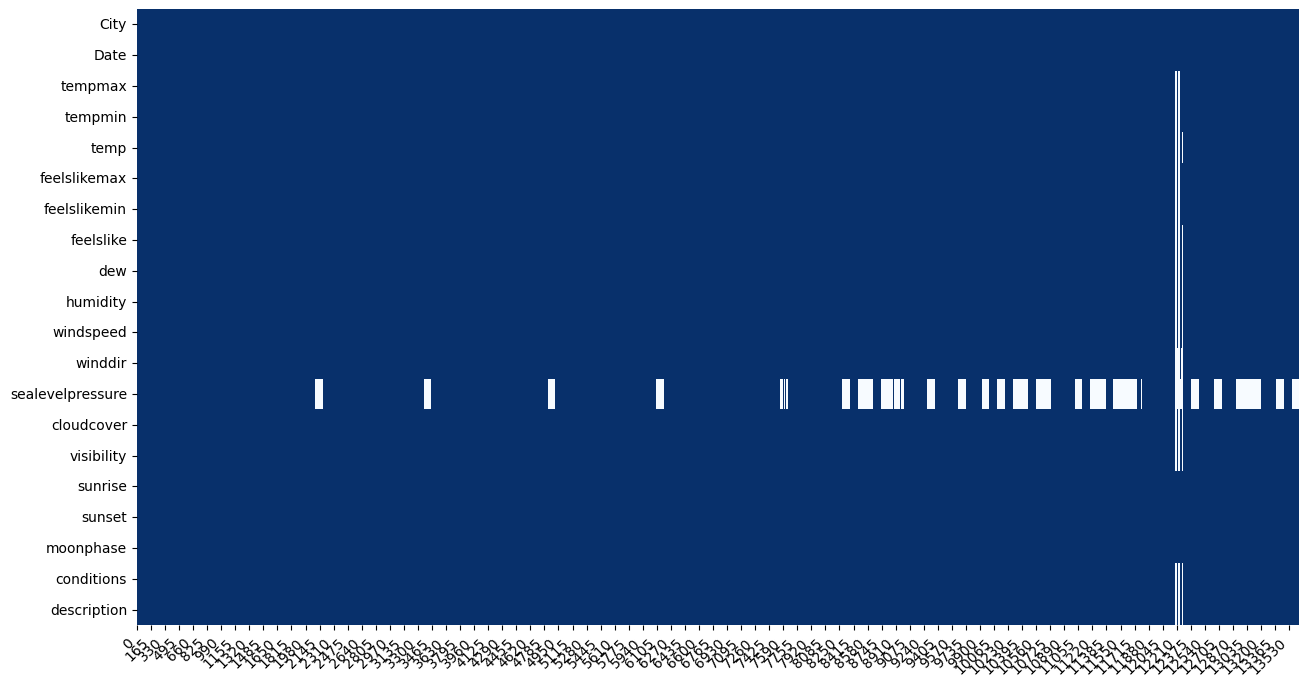

In [3]:
plot_missing_value(df)

In [4]:
df.shape

(13650, 20)

In [5]:
df.columns

Index(['City', 'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description'],
      dtype='object')

In [6]:
df.duplicated().sum()

91

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

City                   0
Date                   0
tempmax               35
tempmin               35
temp                  45
feelslikemax          36
feelslikemin          36
feelslike             46
dew                   45
humidity              45
windspeed             45
winddir               50
sealevelpressure    3019
cloudcover            45
visibility            45
sunrise                0
sunset                 0
moonphase              0
conditions            45
description           45
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13559 entries, 0 to 13649
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              13559 non-null  object 
 1   Date              13559 non-null  object 
 2   tempmax           13524 non-null  float64
 3   tempmin           13524 non-null  float64
 4   temp              13514 non-null  float64
 5   feelslikemax      13523 non-null  float64
 6   feelslikemin      13523 non-null  float64
 7   feelslike         13513 non-null  float64
 8   dew               13514 non-null  float64
 9   humidity          13514 non-null  float64
 10  windspeed         13514 non-null  float64
 11  winddir           13509 non-null  float64
 12  sealevelpressure  10540 non-null  float64
 13  cloudcover        13514 non-null  float64
 14  visibility        13514 non-null  float64
 15  sunrise           13559 non-null  object 
 16  sunset            13559 non-null  object

In [11]:
df.nunique()

City                   15
Date                  910
tempmax               220
tempmin               194
temp                  188
feelslikemax          321
feelslikemin          253
feelslike             265
dew                   317
humidity             6100
windspeed             384
winddir              2490
sealevelpressure      260
cloudcover            977
visibility             80
sunrise             13542
sunset              13543
moonphase             101
conditions              6
description            31
dtype: int64

In [12]:
df['City'].unique()

array(['New Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Hyderabad',
       'Bengaluru', 'Pune', 'Ahmedabad', 'Surat', 'Jaipur', 'Bhopal',
       'Lucknow', 'Patna', 'Indore', 'Kanpur'], dtype=object)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

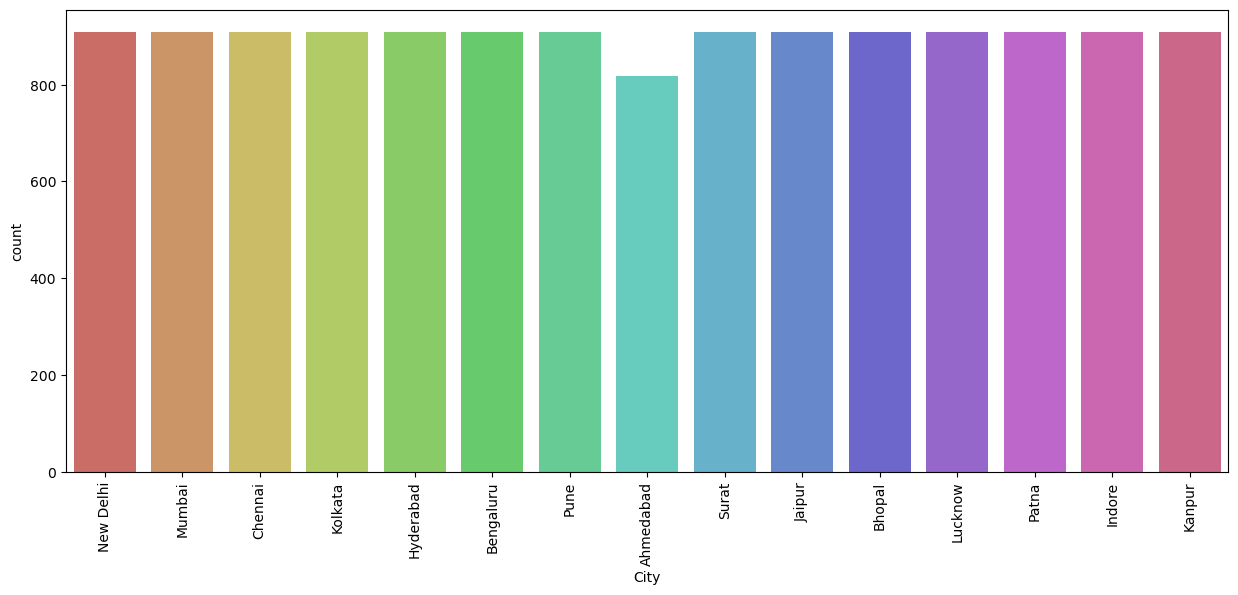

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(df['City'], data = df, palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [23]:
df['City'].value_counts()

New Delhi    910
Mumbai       910
Chennai      910
Kolkata      910
Hyderabad    910
Bengaluru    910
Pune         910
Surat        910
Jaipur       910
Bhopal       910
Lucknow      910
Patna        910
Indore       910
Kanpur       910
Ahmedabad    819
Name: City, dtype: int64

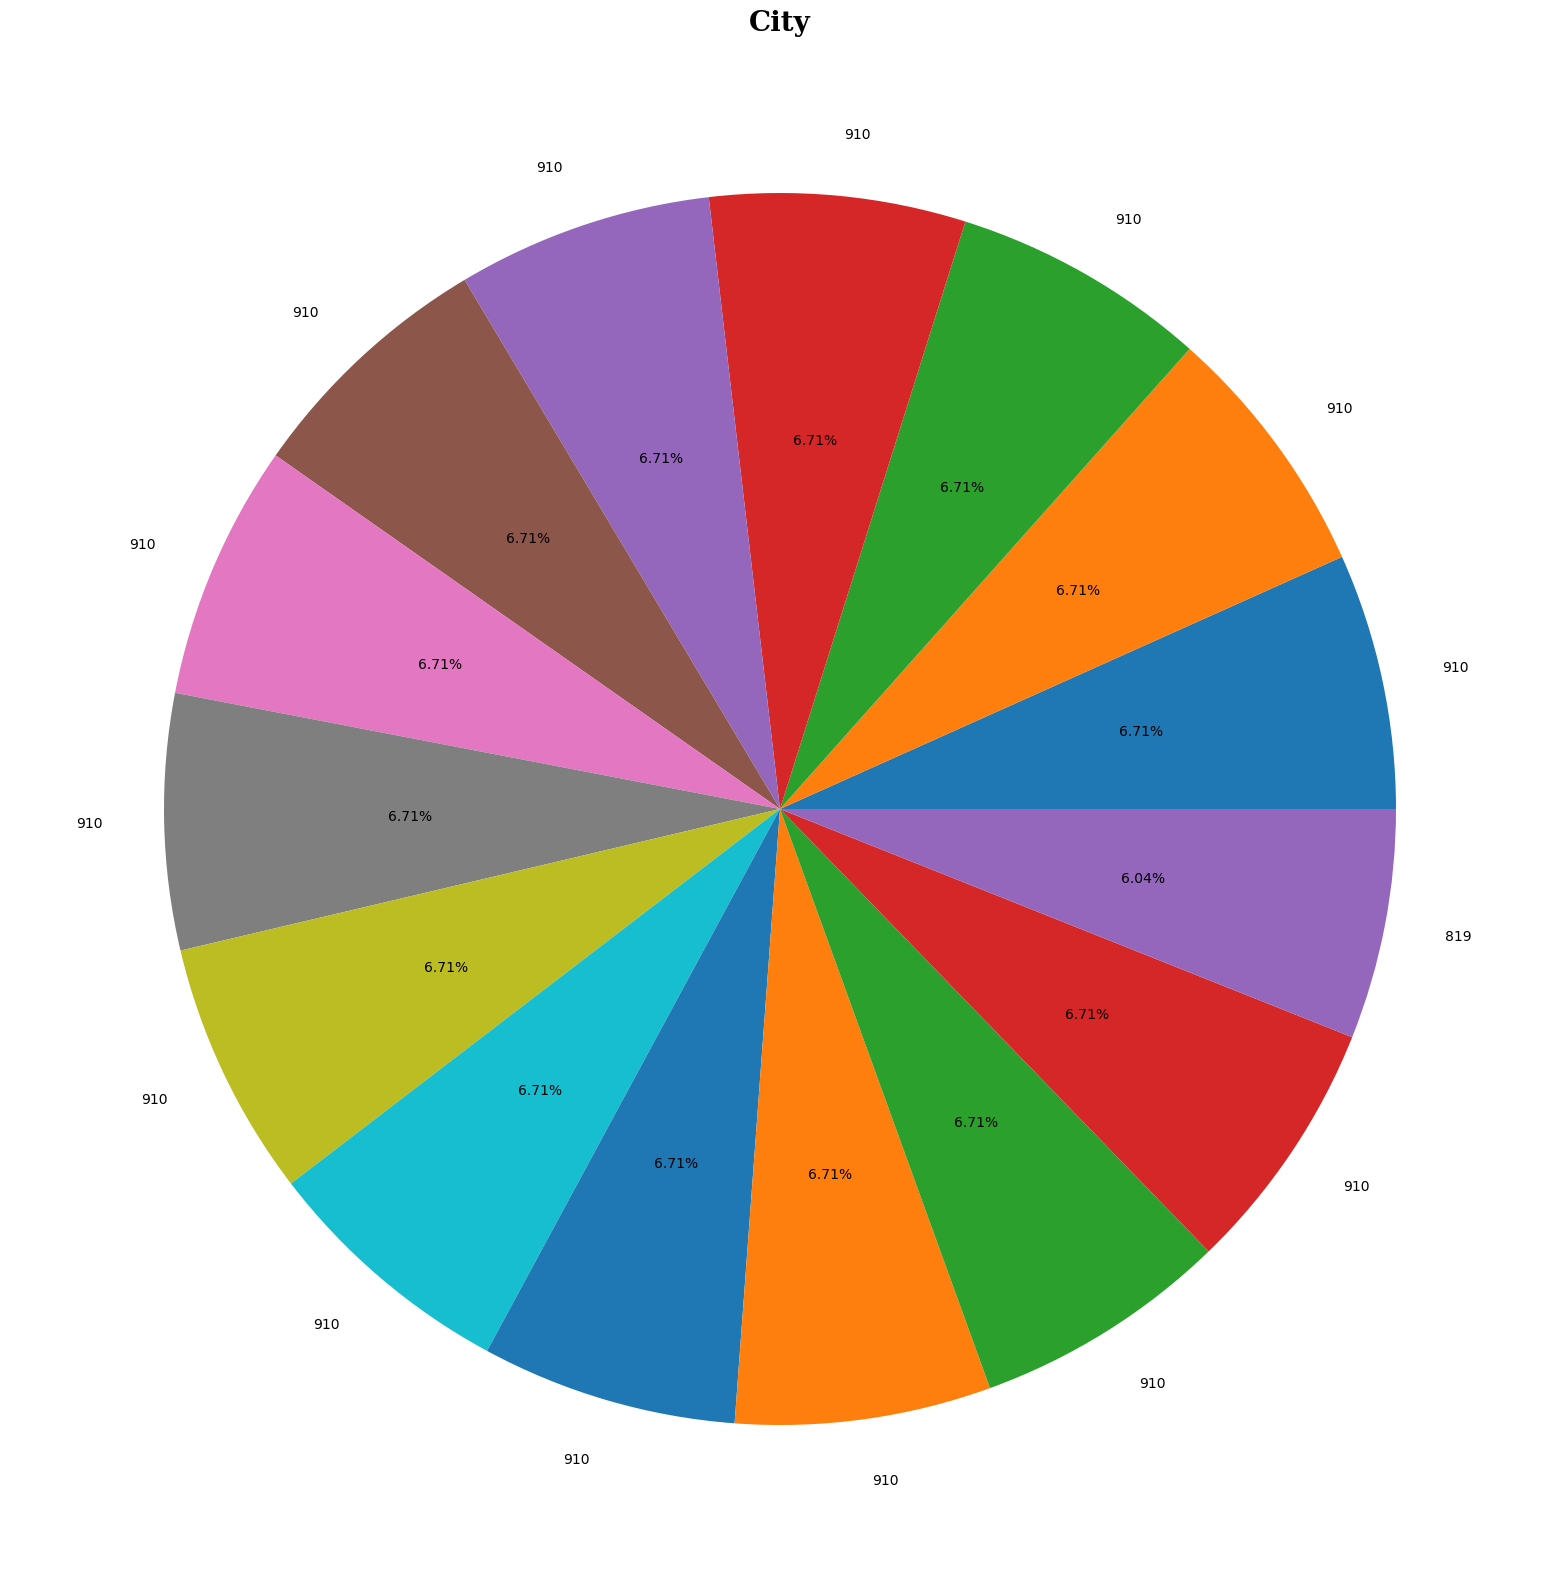

In [24]:
plt.figure(figsize=(30, 20))
plt.pie(df['City'].value_counts(), labels=df['City'].value_counts(), autopct='%1.2f%%')
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('City', size=20, **hfont)
plt.show()

In [25]:
df['conditions'].value_counts()

Partially cloudy          7782
Clear                     3882
Rain, Partially cloudy    1592
Rain, Overcast             136
Overcast                   113
Rain                         9
Name: conditions, dtype: int64

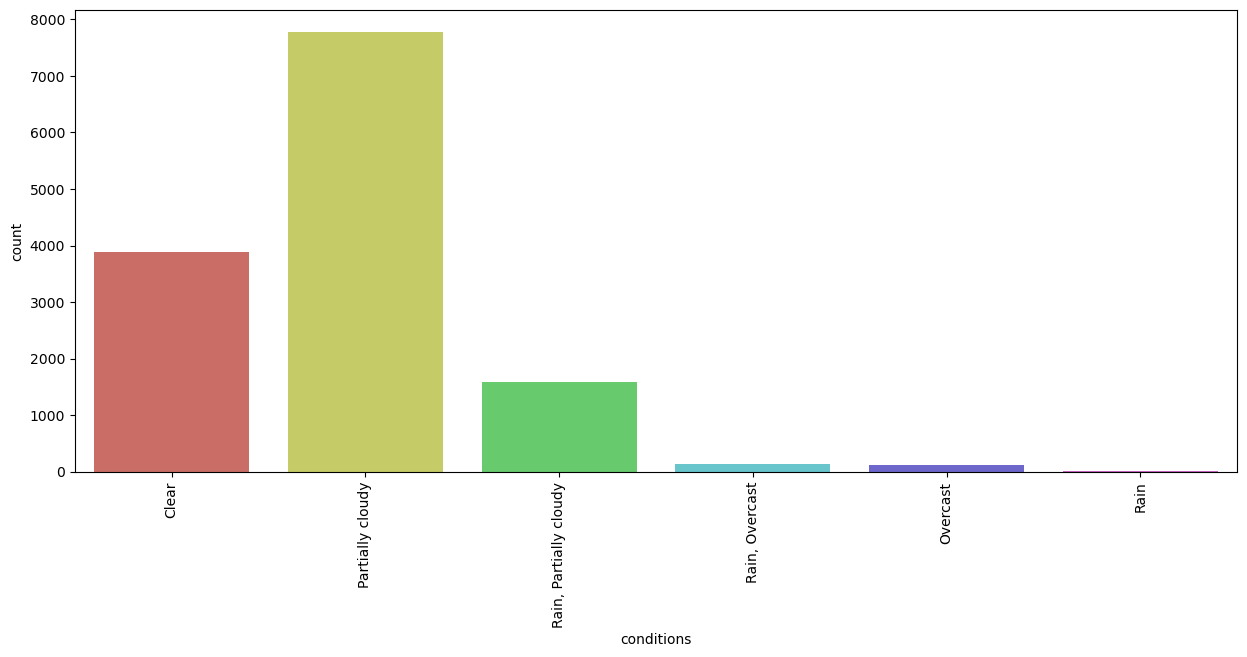

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(df['conditions'], data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [27]:
df['description'].unique()

array(['Clear conditions throughout the day.',
       'Partly cloudy throughout the day.',
       'Partly cloudy throughout the day with late afternoon rain.',
       'Partly cloudy throughout the day with morning rain.',
       'Becoming cloudy in the afternoon.',
       'Partly cloudy throughout the day with afternoon rain.',
       'Partly cloudy throughout the day with rain in the morning and afternoon.',
       'Clearing in the afternoon.',
       'Cloudy skies throughout the day with afternoon rain.',
       'Cloudy skies throughout the day with rain.',
       'Partly cloudy throughout the day with early morning rain.',
       'Clearing in the afternoon with early morning rain.',
       'Partly cloudy throughout the day with rain.',
       'Cloudy skies throughout the day.',
       'Becoming cloudy in the afternoon with late afternoon rain.',
       'Partly cloudy throughout the day with rain clearing later.',
       'Cloudy skies throughout the day with a chance of rain througho